In [82]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [83]:
game_data = "vgsales.csv"
game_sales_data = pd.read_csv(game_data, index_col="Rank")
game_sales_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [84]:
game_sales_data.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [85]:
game_sales_data.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [86]:
copy_sales = game_sales_data

In [87]:
copy_sales.dtypes.value_counts()

float64    6
object     4
dtype: int64

In [88]:
copy_sales.shape

(16598, 10)

In [89]:
copy_sales.isna()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16596,False,False,False,False,False,False,False,False,False,False
16597,False,False,False,False,False,False,False,False,False,False
16598,False,False,False,False,False,False,False,False,False,False


Analyse de la quantité de valeur manquante

In [90]:
copy_sales.isna().sum()/copy_sales.shape[0]
	


Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Analyse des ventes par differentes régions 

In [91]:
copy_sales["Global_Sales"].value_counts(normalize=True)

0.02    0.064526
0.03    0.048861
0.04    0.038860
0.05    0.038077
0.01    0.037233
          ...   
5.01    0.000060
5.05    0.000060
5.07    0.000060
5.11    0.000060
3.16    0.000060
Name: Global_Sales, Length: 623, dtype: float64

In [92]:
copy_sales["Other_Sales"].value_counts()

0.00    6477
0.01    3445
0.02    1582
0.03     939
0.04     666
        ... 
0.98       1
1.63       1
2.12       1
7.53       1
0.93       1
Name: Other_Sales, Length: 157, dtype: int64

In [93]:
copy_sales["EU_Sales"].value_counts()

0.00     5730
0.01     1496
0.02     1269
0.03      934
0.04      748
         ... 
3.42        1
2.38        1
1.99        1
2.10        1
29.02       1
Name: EU_Sales, Length: 305, dtype: int64

In [94]:
copy_sales["JP_Sales"].value_counts()

0.00    10455
0.02      728
0.01      704
0.03      528
0.04      397
        ...  
2.32        1
2.47        1
3.00        1
2.55        1
1.91        1
Name: JP_Sales, Length: 244, dtype: int64

In [95]:
copy_sales["NA_Sales"].value_counts()

0.00    4499
0.02     550
0.01     541
0.03     533
0.05     530
        ... 
2.97       1
2.54       1
2.95       1
3.28       1
3.19       1
Name: NA_Sales, Length: 409, dtype: int64

ANALYSE DES DIFFERENTS PRIX PAR RAPPORTS AUX "platform", "genre", "publisher"

In [96]:
for val in copy_sales.select_dtypes("object"):
    print(val)

Name
Platform
Genre
Publisher


In [99]:
copy_sales = copy_sales[copy_sales["Publisher"] != "Warp"]


Filtrage des données selon le prix Global de vente Global_Sales

In [114]:
copy_sales = copy_sales[copy_sales["Global_Sales"] > 2]

In [115]:
copy_sales.shape

(846, 10)

In [117]:
copy_sales["Global_Sales"].value_counts(normalize=True)

2.79     0.011820
2.08     0.010638
2.09     0.010638
2.11     0.010638
2.28     0.010638
           ...   
6.36     0.001182
3.82     0.001182
3.81     0.001182
3.79     0.001182
82.74    0.001182
Name: Global_Sales, Length: 423, dtype: float64

<Axes: xlabel='Global_Sales', ylabel='Publisher'>

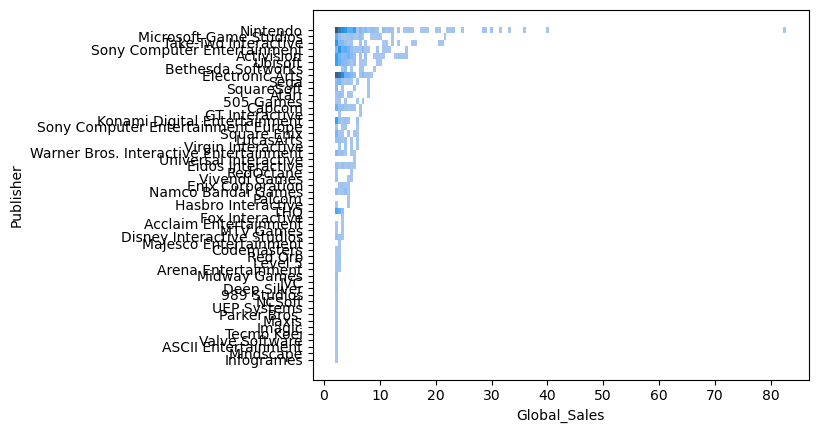

In [130]:
sns.histplot(data=copy_sales, x="Global_Sales", y="Publisher")

In [132]:

copy_sales["Global_Sales"]

Rank
1      82.74
2      40.24
3      35.82
4      33.00
5      31.37
       ...  
843     2.02
844     2.02
845     2.02
846     2.01
847     2.01
Name: Global_Sales, Length: 846, dtype: float64

<Axes: xlabel='Global_Sales', ylabel='Count'>

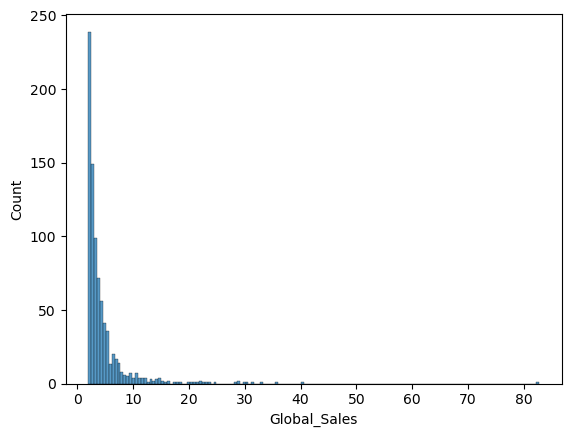

In [133]:
sns.histplot(copy_sales["Global_Sales}"])

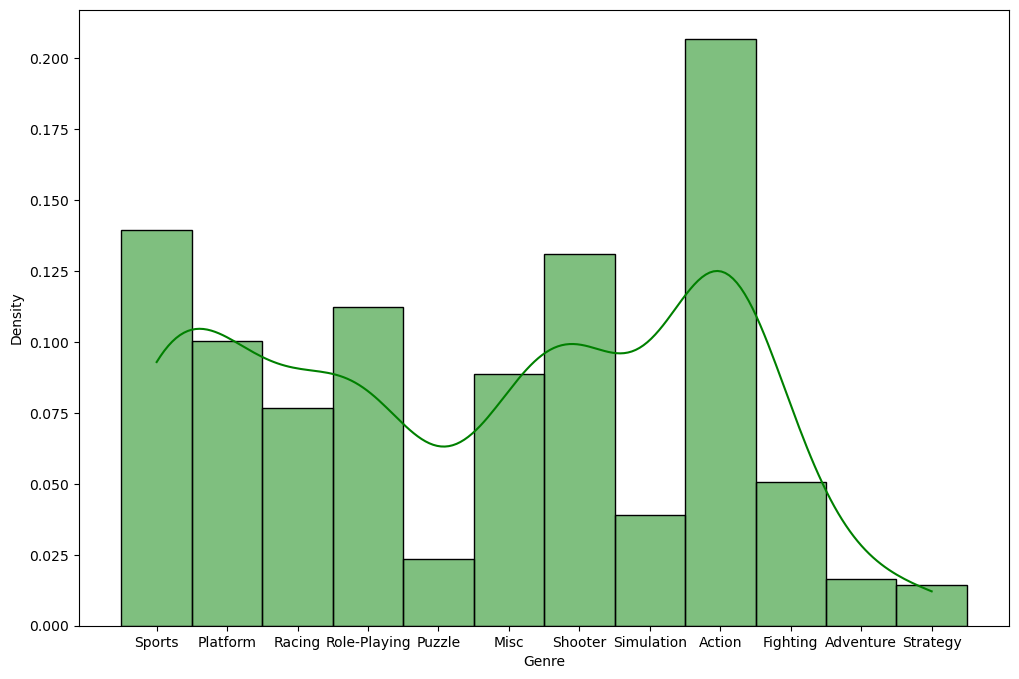

In [148]:

plt.figure(figsize=(12,8))
sns.histplot(copy_sales["Genre"], kde=True, label = "Genre", color="green", stat="density" )
plt.xlabel("Genre")
plt.show()


<Axes: xlabel='Year', ylabel='Global_Sales'>

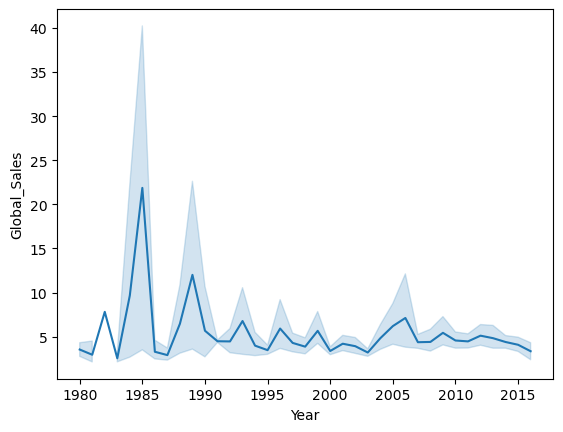

In [144]:
sns.lineplot(data=copy_sales, x= "Year", y="Global_Sales")